<br>
<p style="text-align: right; font-weight: bold; font-size: 50px"> Chapter. 2</p>
<p style="text-align: right; font-weight: bold; font-size: 25px"> : Machine Learning Preview</p>

<button type="button" style="float: right;"> 13기 디자인팀 박준성 </button>

---

# 0. Open Dataset
- [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)  
- [Kaggle Dataset](http://www.kaggle.com/datasets)  
- [Amazon AWS Dataset](http://aws.amazon.com/ko/datasets)  
---

# 1. Preparing Project
## Machine Learning System
1. <b>Supervised Laerning</b><s style="font-size:8px;">(회귀, 분류)</s> / <b>Unsupervised Learning</b> / <b>Reinforcement Learning</b> 중에 맞는 것을 선택한다.  
2. 모델에 사용될 Feature의 종류와 수를 확인한다.  
3. 데이터의 수와 상태에 따라, <b>'Batch Learning'</b>과 <b>'Online Learning'</b>을 정한다.
    - <b>Batch Learning:</b> 데이터 전체를 한 번에 학습.
    - <b>Online Learning:</b> 데이터를 순차적으로 mini-batch를 통해서 학습.
<br>

## Perfomance Measure
<p style="text-align: right;">(출처: [Machine Learning Mastery](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/))  </p>

### 1. Classification

#### 1.1 Classification Accuracy
: 모든 예측 중에서 올바른 예측의 비율  
Classification에 있어서 가장 기본적은 metric으로 각 클래스의 개수가 같고, Prediction과 Prediction Errors가 동등하게 중요할 경우에만 사용 가능하다.

In [32]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("data/heart.csv")
array = df.values
X = array[:,0:13]
Y = array[:,13]
kfold = model_selection.KFold(n_splits=10, random_state = 0)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
print("Accuracy: %.4f " %results.mean())

Accuracy: 0.7945 


In [35]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#### 1.2 Log Loss
: 확률값을 Prediction Input으로 받는 metric으로 0에 가까울수록 좋다.  
따라서, (-)를 곱한Negative Log Loss를 사용함으로 직관적으로 클수록 좋다로 판단.
<p style = "text-align: center; font-size: 17px;">${Log Loss} = {-(y\log(p) + (1-y)\log(1-p))}$  </p>

In [90]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

df = pd.read_csv("data/heart.csv")
array = df.values
X = array[:,0:13]
y = array[:,13]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 0)
model = LogisticRegression()
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)

log_loss_ = log_loss(y_test, prob)

print("Log Loss: %.4f " %log_loss_)

Log Loss: 0.4224 


#### 1.3 Confusion Matrix
: Classification의 성능을 시각화한 테이블이다.  
행은 Actual Class, 열은 Predicted Class에 해당한다.(반대도 가능)  
<img src = "./img/confusion_matrix.png"></img>  
- <b>TP(True Positive(2,2)):</b> Actual = 1, Prediction = 1
- <b>TN(True Negative(1,1)):</b> Actual = 0, Prediction = 0
- <b>FP(False Positive(1,2)):</b> Actual = 0, Prediction = 1 (Type I error)
- <b>FN(False Negative(2,1)):</b> Actual = 1, Prediction = 0 (Type II error)  
<br>
Class의 수가 2개 이상일 경우에 사용 가능하다. 

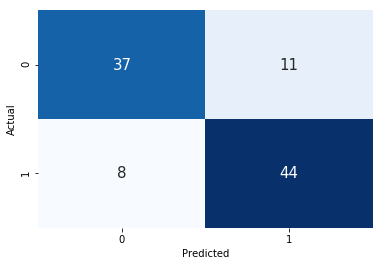

In [98]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

df = pd.read_csv("data/heart.csv")
array = df.values
X = array[:,0:13]
y = array[:,13]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 0)
model = LogisticRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

ax = sns.heatmap(matrix, annot = True, cmap = 'Blues', annot_kws = {"size":15}, cbar = False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax

<br>  
<p style = "text-align: center; font-weight:bold; font-size: 20px;">< Confusion Matrix ></p>
<img src = "./img/confusion_matrix.png"></img>  
- <b>Accuracy:</b> 전체에서 잘 분류한 것의 비율
<br>  
$$ Accuracy = \frac {TP+TN} {TP+FN+FP+TN} $$
<br>
※ 가장 직관적으로 모델의 성능을 파악할 수 있다.  
하지만, data의 y값이 bias된 경우에 데이터가 불균형하여 한 쪽을 예측하는 성능만 좋아진다.  
<br>
- <b>Precision:</b> True로 분류한 것 중에서 실제로 True인 것의 비율
<br>  
$$ Precision = \frac {TP} {TP+FP} $$
<br>
※ 모델 기준에서 True를 True라고 맞추는 경우  
<br>
- <b>Recall(Sensitivity):</b> 실제 True인 것 중에서 True로 분류한 것의 비율
<br>  
$$ Recall = \frac {TP} {TP+FN} $$
<br>
※ 실제 데이터 기준에서 True를 True라고 맞추는 경우  
<br>

- <b>F1-Score:</b> Precision과 Recall의 조화평균
<br>  
$$ F1-Score = 2 * \frac 1 {\frac 1 {Precision} + \frac 1 {Recall}} = 2 * \frac {Precision * Recall} {Precision + Recall} $$
<br>
※ data의 y값이 bias된 경우에 사용하면 좋다.  
<br>
<b>※ Precision과 Recall은 모두 높은 것이 좋지만, 둘은 trade-off 관계에 있다.</b>

#### 1.4 AUC (Area Under ROC Curve)
* <b>ROC Curve:</b>